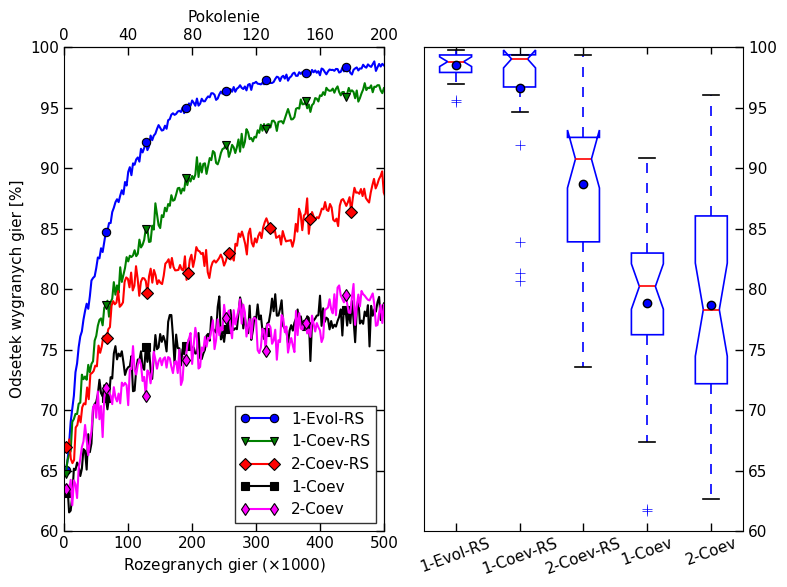

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.weight": "light",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "font.size": 11,
})

files = {
    "1-Evol-RS": "1ers.csv",
    "1-Coev-RS": "1crs.csv",
    "2-Coev-RS": "2crs.csv",
    "1-Coev":    "1c.csv",
    "2-Coev":    "2c.csv",
}

line_colors = {
    "1-Evol-RS": "blue",
    "1-Coev-RS": "green",
    "2-Coev-RS": "red",
    "1-Coev":    "black",
    "2-Coev":    "magenta",
}

markers = {
    "1-Evol-RS": "o",
    "1-Coev-RS": "v",
    "2-Coev-RS": "D",
    "1-Coev":    "s",
    "2-Coev":    "d",
}

labels = ["1-Evol-RS", "1-Coev-RS", "2-Coev-RS", "1-Coev", "2-Coev"]

results = {}

for label, fname in files.items():
    df = pd.read_csv(fname, sep=",")
    df.columns = df.columns.str.strip().str.lower()

    generation = df["generation"].to_numpy()
    effort = df["effort"].to_numpy()
    run_cols = [c for c in df.columns if c.startswith("run-")]

    runs = df[run_cols].to_numpy()
    if runs.max() <= 1.5:
        runs = runs * 100

    results[label] = {
        "generation": generation,
        "effort_k": effort / 1000.0,
        "mean": runs.mean(axis=1),
        "final": runs[-1, :],
    }

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

for label in labels:
    res = results[label]
    x = res["effort_k"]
    y = res["mean"]

    step = max(len(x) // 8, 4)

    ax1.plot(
        x,
        y,
        color=line_colors[label],
        marker=markers[label],
        linestyle='-',
        linewidth=1.5,
        markevery=step,
        markersize=6,
        markeredgecolor='black',
        markeredgewidth=0.8,
        markerfacecolor=line_colors[label],
        label=label,
    )

ax1.legend(
    loc="lower right",
    frameon=True,
    fancybox=False,
    edgecolor="black",
    numpoints=2,
    handlelength=2.5,
)

ax1.set_xlabel(r"Rozegranych gier ($\times 1000$)")
ax1.set_ylabel(r"Odsetek wygranych gier [%]")
ax1.set_xlim(0, 500)
ax1.set_ylim(60, 100)
ax1.grid(False)
ax1.tick_params(direction="in", length=6, width=1)

ax1_right = ax1.secondary_yaxis('right')
ax1_right.set_yticklabels([])
ax1_right.tick_params(direction="in", length=6, width=1)
ax1_right.set_ylabel("")


def games_to_gen(x):
    return x / 2.5  # 500 / 200 = 2.5

def gen_to_games(g):
    return g * 2.5

secax = ax1.secondary_xaxis('top', functions=(games_to_gen, gen_to_games))
secax.set_xlabel("Pokolenie")
secax.set_xlim(0, 200)
secax.set_xticks([0, 40, 80, 120, 160, 200])
secax.tick_params(direction="in", length=6, width=1)

data_box = [results[label]["final"] for label in labels]

bp = ax2.boxplot(
    data_box,
    notch=True,
    tick_labels=labels,
    showmeans=True,
    patch_artist=True,
    meanprops=dict(marker='o', markersize=6, markerfacecolor='blue', markeredgecolor='black'),
    boxprops=dict(linewidth=1.2, edgecolor='blue'),
    medianprops=dict(linewidth=1.2, color='red'),
    whiskerprops=dict(linewidth=1.2, color='blue', linestyle=(0, (6, 6))),
    capprops=dict(linewidth=1.2, color='black'),
    flierprops=dict(marker='+', markersize=7, markeredgecolor='blue', markeredgewidth=0.5, linestyle='none'),
)

for box in bp['boxes']:
    box.set_facecolor('white')

for tick in ax2.get_xticklabels():
    tick.set_rotation(20)
    tick.set_ha('center')

ax2.set_ylim(60, 100)
ax2.set_yticks([60, 65, 70, 75, 80, 85, 90, 95, 100])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.grid(False)
ax2.tick_params(direction="in", length=6, width=1)

ax2_top = ax2.secondary_xaxis('top')
ax2_top.set_xticklabels([])
ax2_top.tick_params(direction="in", length=5, width=1)
ax2_top.set_xlabel("")

fig.tight_layout()
fig.savefig("wizualizacja.pdf", bbox_inches="tight")
plt.show()
